# 2.1

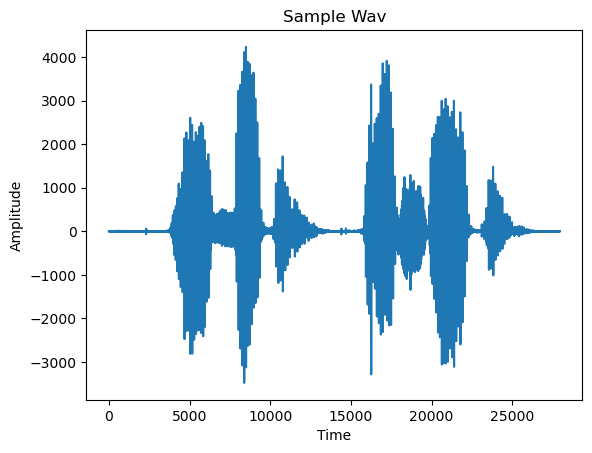

In [2]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import random

# read audio samples
input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
# plot the samples
s = len(audio)
plt.plot(audio[0:s])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

# 2.2

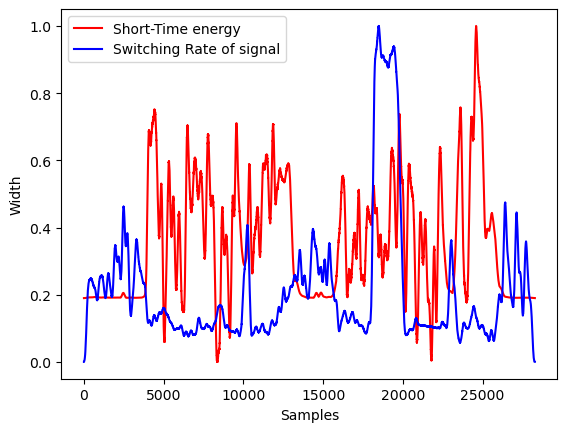

In [3]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import IPython
import sounddevice as sd
import random

#for window = 20 ms
input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
window_time_length = 20 #ms

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
y1 = np.convolve(audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(audio)):
    z.append(abs(np.sign(audio[n]) - np.sign(audio[n-1])))
y2 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()
#plot the graphs
plt.plot(norm1(y1[0:len(y1)]), color = 'r', label = "Short-Time energy")
plt.plot(norm2(y2[0:len(y2)]), color = 'b', label ="Switching Rate of signal")
plt.ylabel("Width")
plt.xlabel("Samples")
plt.legend()

plt.show()

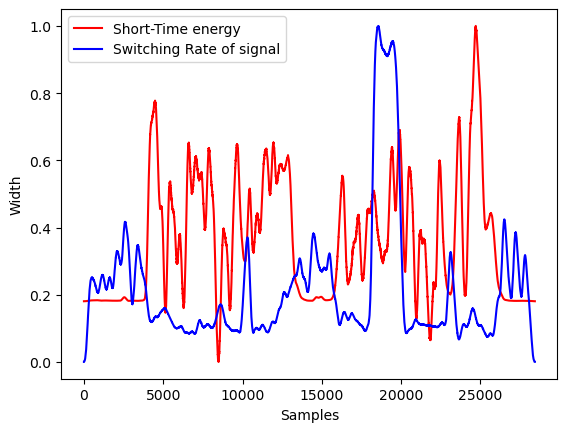

In [4]:
# for window = 30ms

input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
window_time_length = 30 #ms

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
y1 = np.convolve(audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(audio)):
    z.append(abs(np.sign(audio[n]) - np.sign(audio[n-1])))
y2 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()
#plot the graphs
plt.plot(norm1(y1[0:len(y1)]), color = 'r', label = "Short-Time energy")
plt.plot(norm2(y2[0:len(y2)]), color = 'b', label ="Switching Rate of signal")
plt.ylabel("Width")
plt.xlabel("Samples")
plt.legend()

plt.show()

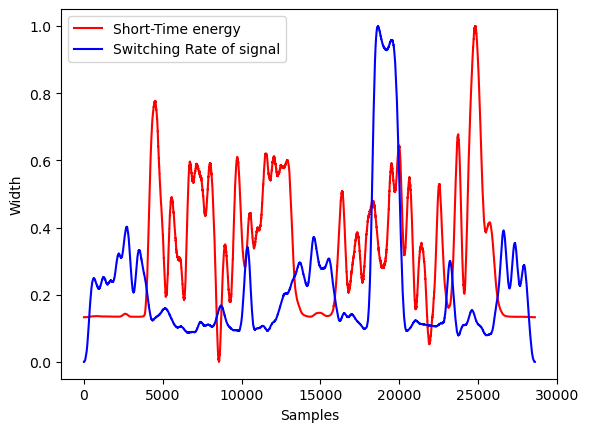

In [5]:
# for window = 40ms

input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
window_time_length = 40 #ms

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
y1 = np.convolve(audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(audio)):
    z.append(abs(np.sign(audio[n]) - np.sign(audio[n-1])))
y2 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()
#plot the graphs
plt.plot(norm1(y1[0:len(y1)]), color = 'r', label = "Short-Time energy")
plt.plot(norm2(y2[0:len(y2)]), color = 'b', label ="Switching Rate of signal")
plt.ylabel("Width")
plt.xlabel("Samples")
plt.legend()

plt.show()

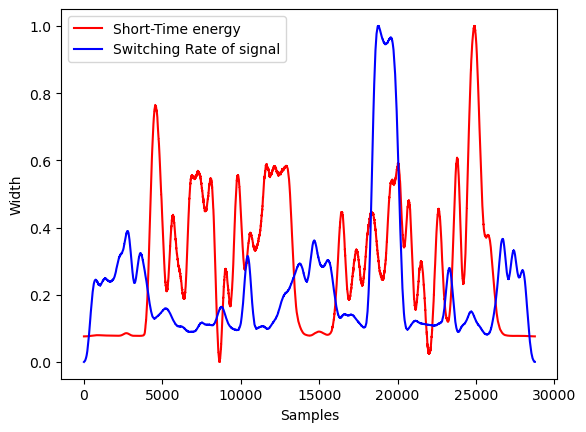

In [6]:
# for window = 50ms

input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
window_time_length = 50 #ms

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
y1 = np.convolve(audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(audio)):
    z.append(abs(np.sign(audio[n]) - np.sign(audio[n-1])))
y2 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()
#plot the graphs
plt.plot(norm1(y1[0:len(y1)]), color = 'r', label = "Short-Time energy")
plt.plot(norm2(y2[0:len(y2)]), color = 'b', label ="Switching Rate of signal")
plt.ylabel("Width")
plt.xlabel("Samples")
plt.legend()

plt.show()

# 2.3

Text(0, 0.5, 'Frequency')

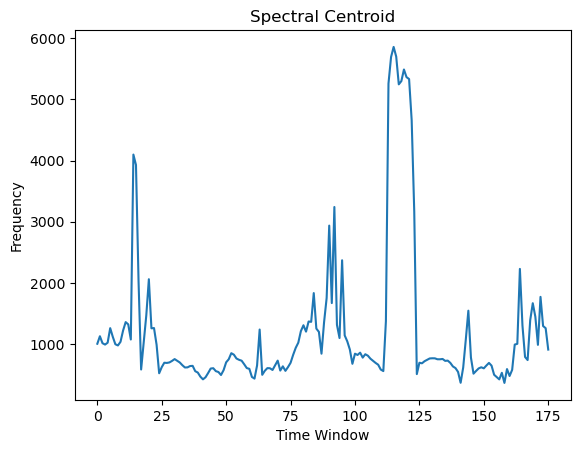

In [4]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import IPython
import sounddevice as sd
import random

# read audio samples
input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
fs = sampling_rate*1000
window_time_length = 20 #ms
N = 2048

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#calculate Short Time Fourier Transform
f, t, X_stft = sp.signal.stft(audio, fs, nperseg = window_length, nfft = N)
#calcualte spectral centroid
SC = list()

for m in range(0, len(X_stft[0])):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += k*abs(X_stft[k][m]**2)
        subsum2 += abs(X_stft[k][m]**2)
    SC.append((subsum1/subsum2)*(fs)/N)

#calculate spectral flux
SF = list()
for m in range(0, len(X_stft[0]) - 1):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += abs(X_stft[k][m+1])**2
        subsum2 += abs(X_stft[k][m])**2
    SF.append(((abs(X_stft[0][m+1])**2)/subsum1 - (abs(X_stft[0][m])**2)/subsum2)**2)
    for k in range(1 , N//2):
        SF[m] +=((abs(X_stft[k][m+1])**2)/subsum1 - (abs(X_stft[k][m])**2)/subsum2)**2
    SF[m] = np.sqrt(SF[m])

#plot signals
# plt.subplot(1,2,1)
plt.title("Spectral Centroid")
plt.plot(SC[0:len(SC)])
plt.xlabel("Time Window")
plt.ylabel("Frequency")

# plt.subplot(1,2,2)

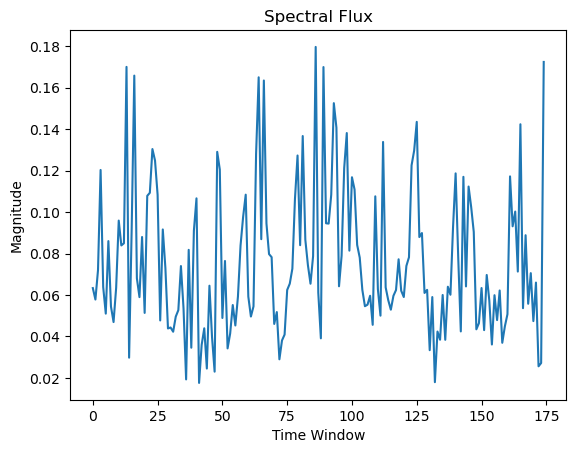

In [5]:
plt.title("Spectral Flux")
plt.plot(SF[0:len(SF)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")
plt.show()

Text(0, 0.5, 'Frequency')

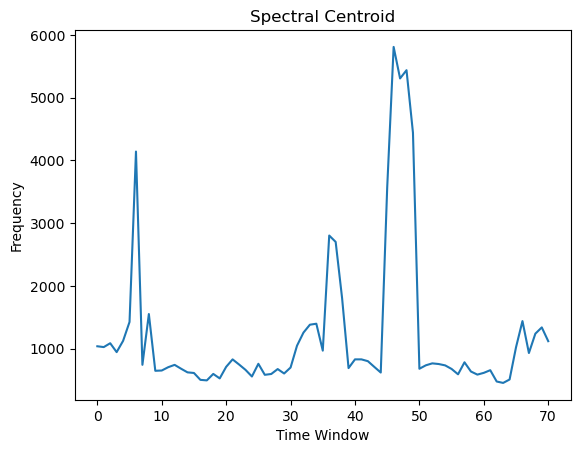

In [6]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import IPython
import sounddevice as sd
import random

# read audio samples
input_data = sp.io.wavfile.read("speech_utterance.wav");
audio = input_data[1]
sampling_rate = 16 #kHZ
fs = sampling_rate*1000
window_time_length = 50 #ms
N = 2048

#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#calculate Short Time Fourier Transform
f, t, X_stft = sp.signal.stft(audio, fs, nperseg = window_length, nfft = N)
#calcualte spectral centroid
SC = list()

for m in range(0, len(X_stft[0])):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += k*abs(X_stft[k][m]**2)
        subsum2 += abs(X_stft[k][m]**2)
    SC.append((subsum1/subsum2)*(fs)/N)

#calculate spectral flux
SF = list()
for m in range(0, len(X_stft[0]) - 1):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += abs(X_stft[k][m+1])**2
        subsum2 += abs(X_stft[k][m])**2
    SF.append(((abs(X_stft[0][m+1])**2)/subsum1 - (abs(X_stft[0][m])**2)/subsum2)**2)
    for k in range(1 , N//2):
        SF[m] +=((abs(X_stft[k][m+1])**2)/subsum1 - (abs(X_stft[k][m])**2)/subsum2)**2
    SF[m] = np.sqrt(SF[m])

#plot signals
# plt.subplot(1,2,1)
plt.title("Spectral Centroid")
plt.plot(SC[0:len(SC)])
plt.xlabel("Time Window")
plt.ylabel("Frequency")

# plt.subplot(1,2,2)

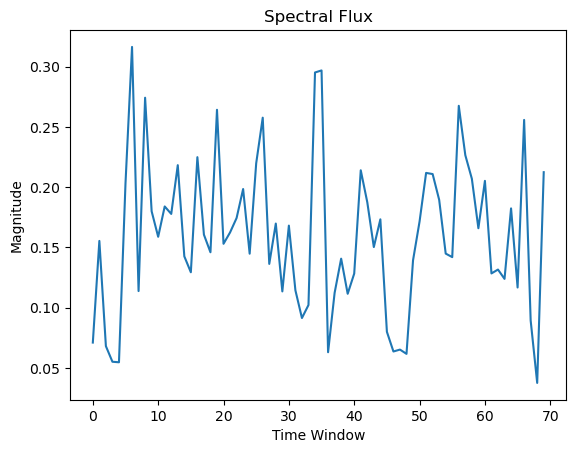

In [7]:
plt.title("Spectral Flux")
plt.plot(SF[0:len(SF)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")
plt.show()

# 2.4

48000
# of freq points: 7201
#of windows: 85


Text(0, 0.5, 'Magnitude')

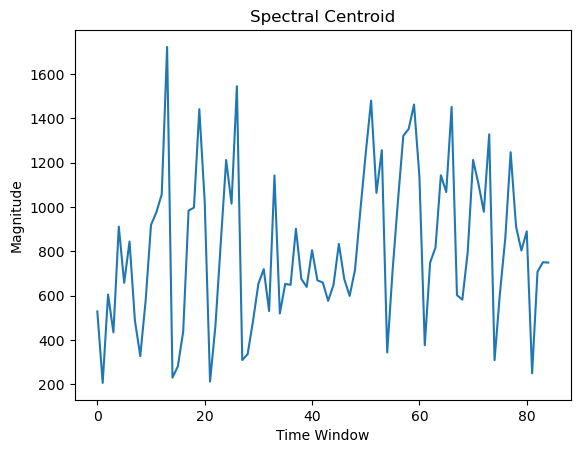

In [8]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import IPython
import sounddevice as sd
import random

# read audio samples
input_data = sp.io.wavfile.read("music.wav")
print(input_data[0])
stereo_audio = input_data[1]
mono_audio = (stereo_audio)/2
sampling_rate = 48 #kHZ
window_time_length = 150 #ms

#calculate Short Time Fourier Transform
f, t, X_stft = sp.signal.stft(stereo_audio, fs=sampling_rate*1000, nperseg=window_time_length*sampling_rate*2)
N = len(X_stft)
print("# of freq points: " + str(N))
print("#of windows: " + str(len(X_stft[0])))
#calcualte spectral centroid
SC = list()

for m in range(0, len(X_stft[0])):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += k*abs(X_stft[k][m])**2
        subsum2 += abs(X_stft[k][m])**2
    SC.append((subsum1/subsum2)*(sampling_rate*1000)/N)

#calculate spectral flux
SF = list()
for m in range(0, len(X_stft[0]) - 1):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += abs(X_stft[k][m+1])**2
        subsum2 += abs(X_stft[k][m])**2
    if(subsum1 == 0 or subsum2 == 0): print("error")
    SF.append(((abs(X_stft[0][m+1])**2)/subsum1 - (abs(X_stft[0][m])**2)/subsum2)**2)
    for k in range(1 , N//2):
        SF[m] += ((abs(X_stft[k][m+1])**2)/subsum1 - (abs(X_stft[k][m])**2)/subsum2)**2
    SF[m] = np.sqrt(SF[m])


#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
short_time_energy1 = np.convolve(mono_audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(mono_audio)):
    z.append(abs(np.sign(mono_audio[n]) - np.sign(mono_audio[n-1])))
zero_crossing_rate1 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()

#plot spectral centroid-spectral flux
plt.title("Spectral Centroid")
plt.plot(SC[0:len(SC)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")

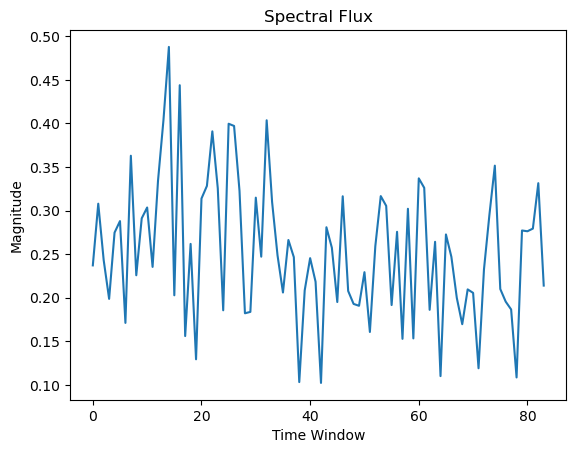

In [9]:
plt.title("Spectral Flux")
plt.plot(SF[0:len(SF)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")
plt.show()

Text(0.5, 0, 'Samples')

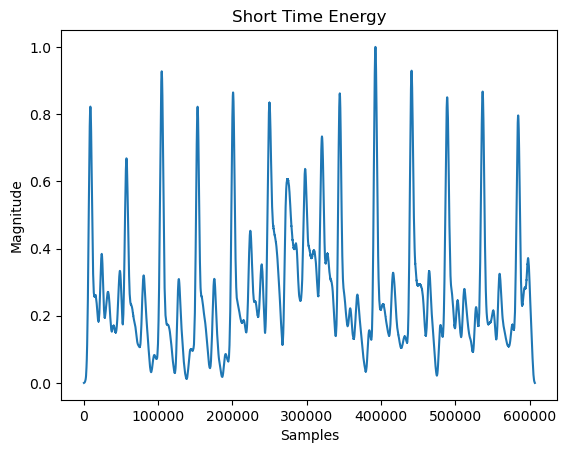

In [10]:
#plot zero crossing rate/short time energy
plt.title("Short Time Energy")
plt.plot(norm1(short_time_energy1[0:len(short_time_energy1)]))
plt.ylabel("Magnitude")
plt.xlabel("Samples")


Text(0.5, 0, 'Samples')

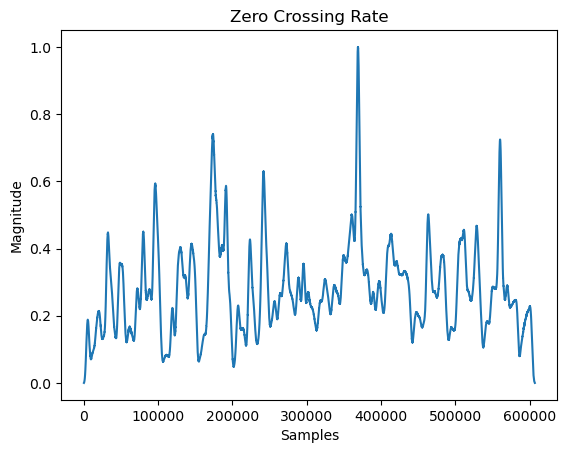

In [11]:
plt.title("Zero Crossing Rate")
plt.plot(norm2(zero_crossing_rate1[0:len(zero_crossing_rate1)]))
plt.ylabel("Magnitude")
plt.xlabel("Samples")

48000
# of freq points: 21601
#of windows: 29


Text(0, 0.5, 'Magnitude')

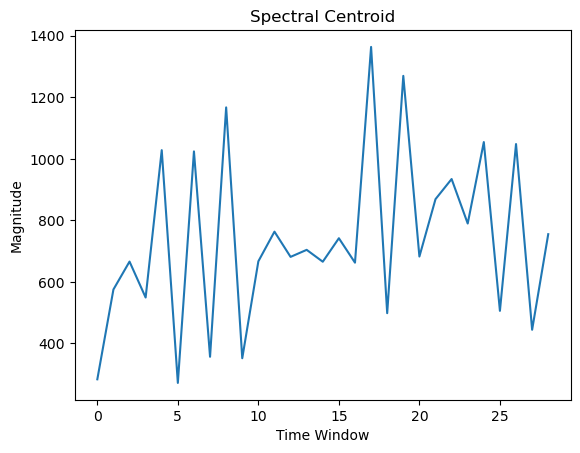

In [12]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import IPython
import sounddevice as sd
import random

# read audio samples
input_data = sp.io.wavfile.read("music.wav")
print(input_data[0])
stereo_audio = input_data[1]
mono_audio = (stereo_audio)/2
sampling_rate = 48 #kHZ
window_time_length = 450 #ms

#calculate Short Time Fourier Transform
f, t, X_stft = sp.signal.stft(stereo_audio, fs=sampling_rate*1000, nperseg=window_time_length*sampling_rate*2)
N = len(X_stft)
print("# of freq points: " + str(N))
print("#of windows: " + str(len(X_stft[0])))
#calcualte spectral centroid
SC = list()

for m in range(0, len(X_stft[0])):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += k*abs(X_stft[k][m])**2
        subsum2 += abs(X_stft[k][m])**2
    SC.append((subsum1/subsum2)*(sampling_rate*1000)/N)

#calculate spectral flux
SF = list()
for m in range(0, len(X_stft[0]) - 1):
    subsum1 = 0
    subsum2 = 0
    for k in range(0, N//2):
        subsum1 += abs(X_stft[k][m+1])**2
        subsum2 += abs(X_stft[k][m])**2
    if(subsum1 == 0 or subsum2 == 0): print("error")
    SF.append(((abs(X_stft[0][m+1])**2)/subsum1 - (abs(X_stft[0][m])**2)/subsum2)**2)
    for k in range(1 , N//2):
        SF[m] += ((abs(X_stft[k][m+1])**2)/subsum1 - (abs(X_stft[k][m])**2)/subsum2)**2
    SF[m] = np.sqrt(SF[m])


#calculate window length
window_length = sampling_rate * window_time_length
#Set up the hamming window
w = np.hamming(window_length)
#convolve square of audio with hamming window to calculate short-time energy
short_time_energy1 = np.convolve(mono_audio**2, w)

#calculate zero crossing rate
z = []
for n in range(1, len(mono_audio)):
    z.append(abs(np.sign(mono_audio[n]) - np.sign(mono_audio[n-1])))
zero_crossing_rate1 = np.convolve(z, w)

#normalize the graphs(so they can be displayed with the same width)
norm1 = clr.Normalize()
norm2 = clr.Normalize()

#plot spectral centroid-spectral flux
plt.title("Spectral Centroid")
plt.plot(SC[0:len(SC)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")

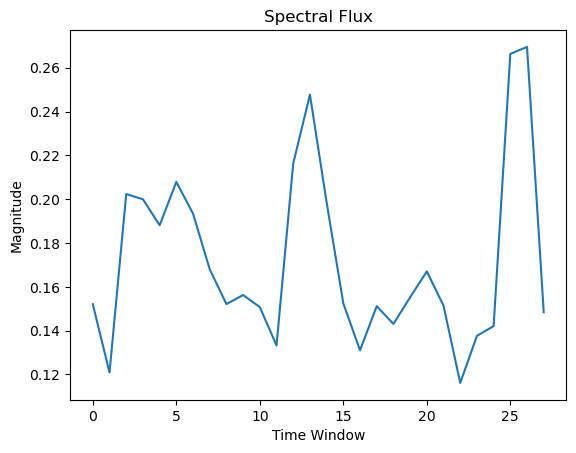

In [13]:
plt.title("Spectral Flux")
plt.plot(SF[0:len(SF)])
plt.xlabel("Time Window")
plt.ylabel("Magnitude")
plt.show()

Text(0.5, 0, 'Samples')

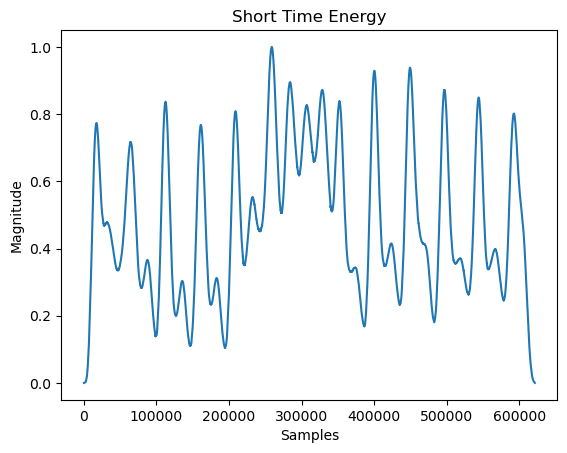

In [14]:
#plot zero crossing rate/short time energy
plt.title("Short Time Energy")
plt.plot(norm1(short_time_energy1[0:len(short_time_energy1)]))
plt.ylabel("Magnitude")
plt.xlabel("Samples")

Text(0.5, 0, 'Samples')

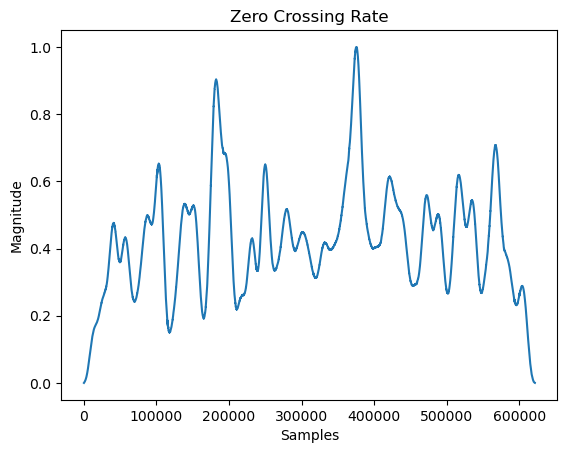

In [15]:
plt.title("Zero Crossing Rate")
plt.plot(norm2(zero_crossing_rate1[0:len(zero_crossing_rate1)]))
plt.ylabel("Magnitude")
plt.xlabel("Samples")